In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.color_palette("pastel")
palette=sns.set_style("whitegrid")

# Reading input files

In [323]:
def read_input():
    crimes_df = pd.read_pickle("Cleaned_Crimes_dataframe.pkl")
    census_df = pd.read_pickle("Cleaned_Census_dataframe.pkl")
    return crimes_df,census_df

In [324]:
crimes_df,census_df=read_input()

In [325]:
crimes_df_date = pd.Series(crimes_df.index)
crimes_df_date = pd.to_datetime(crimes_df_date)
crimes_df['day'] = list(crimes_df_date.dt.day_name())
crimes_df['month'] = list(crimes_df_date.dt.month_name())
crimes_df['hour'] = list(crimes_df_date.dt.hour)

In [326]:
def create_mappings(mapping_dict,dataFrame,attribute):
    mapping_cols={}
    for parent_category, child in mapping_dict.items():
        for key in parent_category:
            mapping_cols[key] = child

    dataFrame[attribute] = dataFrame[attribute].map(mapping_cols)
    return dataFrame

In [327]:

grouped_crime_dict = {}
crimes_dict = {  
    ('CRIMINAL TRESPASS','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','HOMICIDE') : 'CRIMINAL CHARGE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN TRAFFICKING',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTICS',
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL CHARGE',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION','ASSAULT') : 'SEXUAL OFFENSE CHARGE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS OFFENSE CHARGE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER CHARGE'
}
#crimes_df=create_mappings(crimes_dict,crimes_df,"grouped_crime_type")

for groups, value in crimes_dict.items():
    for key in groups:
        grouped_crime_dict[key] = value
crimes_df['grouped_crime_type'] = crimes_df.primarytype.map(grouped_crime_dict)

In [328]:
grouped_loc_dict={}
loc_dict = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', \
     'RESIDENCE-GARAGE','RESIDENTIAL YARD (FRONT/BACK)', \
     'DRIVEWAY - RESIDENTIAL', 'HOUSE','RESIDENCE - YARD (FRONT / BACK)',\
     'RESIDENCE - GARAGE','ROOMING HOUSE','ELEVATOR', 'NURSING HOME', 'NURSING / RETIREMENT HOME',\
     'HOTEL','RESIDENCE - PORCH / HALLWAY','MOTEL','COLLEGE / UNIVERSITY - RESIDENCE HALL',\
     'POOLROOM','HOTEL / MOTEL','PORCH','POOL ROOM') : 'RESIDENTIAL AREA',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', \
     'DEPARTMENT STORE', 'RESTAURANT','ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', \
     'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION','AUTO / BOAT / RV DEALERSHIP', \
     'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',\
     'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER',\
     'MOVIE HOUSE/THEATER','APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', \
     'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL','BOWLING ALLEY', \
     'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', \
     'LIQUOR STORE','GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON','FUNERAL PARLOR',\
     'SCHOOL - PRIVATE GROUNDS','CTA PARKING LOT / GARAGE / OTHER PROPERTY','CLEANERS/LAUNDROMAT'\
     'HOSPITAL BUILDING / GROUNDS', 'PUBLIC HIGH SCHOOL' ,'FACTORY / MANUFACTURING BUILDING', \
     'FACTORY', 'SCHOOL - PRIVATE BUILDING', 'RETAIL STORE','CLUB','TAVERN / LIQUOR STORE',\
     'MEDICAL / DENTAL OFFICE', 'MOVIE HOUSE / THEATER') : 'BUSINESS AREA',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', \
     'TAXICAB','VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', \
     'VEHICLE-COMMERCIAL - TROLLEY BUS','VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS',\
     'VEHICLE - COMMERCIAL','VEHICLE - OTHER RIDE SERVICE','DELIVERY TRUCK',\
     'TAXI CAB', 'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',\
     'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS', 'TRUCK','TRAILER') : 'VEHICLE',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', \
     'SCHOOL, PUBLIC, BUILDING','CHURCH/SYNAGOGUE/PLACE OF WORSHIP', \
     'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',\
     'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', \
     'YMCA', 'HOSPITAL','SCHOOL - PUBLIC BUILDING','COLLEGE / UNIVERSITY - GROUNDS',\
     'EXPRESSWAY EMBANKMENT', 'SCHOOL - PRIVATE GROUNDS','RAILROAD PROPERTY',\
     'COACH HOUSE','CHURCH') : 'PUBLIC BUILDINGS',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', \
     'ALLEY', 'CEMETARY','CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', \
     'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE','SCHOOL, PRIVATE, GROUNDS', \
     'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',\
     'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT',\
     'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA','OTHER RAILROAD PROP / TRAIN DEPOT',\
     'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',\
     'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA',\
     'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',\
     'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',\
     'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA','CTA PROPERTY','CTA "L" PLATFORM',\
     'VACANT LOT', 'VACANT LOT / LAND','VACANT LOT/LAND', 'LAGOON','HIGHWAY / EXPRESSWAY','SEWER',\
     'LIVERY STAND OFFICE','SCHOOL YARD','SCHOOL - PUBLIC GROUNDS',\
     'PUBLIC GRAMMAR SCHOOL', 'SPORTS ARENA / STADIUM', 'CHA BREEZEWAY', 'DUMPSTER',\
     'CHA PARKING LOT / GROUNDS','RIVER', 'JUNK YARD/GARBAGE DUMP', \
     'PARKING LOT / GARAGE (NON RESIDENTIAL)','TAVERN', 'VESTIBULE', 'TRUCKING TERMINAL',\
     'CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'CHURCH PROPERTY', \
     'LAKE','LAKEFRONT / WATERFRONT / RIVERBANK','HIGHWAY/EXPRESSWAY') : 'PUBLIC AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', \
     'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY','FIRE STATION', \
     'GOVERNMENT BUILDING','CHA ELEVATOR','GOVERNMENT BUILDING / PROPERTY',\
     'OTHER RAILROAD PROPERTY / TRAIN DEPOT','COUNTY JAIL', 'CHA STAIRWELL',\
     'POLICE FACILITY / VEHICLE PARKING LOT','CHA PLAY LOT','CHA LOBBY',\
     'CHA HALLWAY') : 'GOVERNMENT LOCATONS',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', \
     'CTA STATION', 'CTA BUS STOP', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',\
     'AIRCRAFT', 'OTHER COMMERCIAL TRANSPORTATION', \
     'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)','CTA TRACKS - RIGHT OF WAY', \
     'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT','CTA "L" TRAIN','PRAIRIE','CHA HALLWAY / STAIRWELL / ELEVATOR') : 'PUBLIC TRANSPORT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)',\
     'CONSTRUCTION SITE', 'NEWSSTAND','COIN OPERATED MACHINE',\
     'HORSE STABLE','FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'BASEMENT',\
     'OTHER (SPECIFY)') : 'OTHER'  
}


for groups, value in loc_dict.items():
    for key in groups:
        grouped_loc_dict[key] = value
crimes_df['grouped_crime_location'] = crimes_df.locationdescription.map(grouped_loc_dict)

In [329]:
crimes_df["arrest"] = crimes_df["arrest"].astype(int)
crimes_df["domestic"] = crimes_df["domestic"] .astype(int)

# Visualisations

## 1. Percentage of different crimes 

([<matplotlib.patches.Wedge at 0x32840e450>,
 [Text(1.5301807913334844, 3.0362059788219296, 'THEFT'),
  Text(-3.193867889614289, 1.1658507210148172, 'CRIMINAL CHARGE'),
  Text(-2.342678270761963, -2.4641141450224544, 'NON-CRIMINAL CHARGE'),
  Text(0.4423312731550418, -3.371104128440568, 'NARCOTICS'),
  Text(2.186169079367452, -2.6039709592116553, 'SEXUAL OFFENSE CHARGE'),
  Text(3.1663861686913655, -1.238546983654643, 'OTHER CHARGE'),
  Text(3.386779442417089, -0.29954133007148537, 'WEAPONS OFFENSE CHARGE'),
  Text(3.3989885604966683, -0.08292626612110487, 'HUMAN TRAFFICKING')],
 [Text(0.8551010304510646, 1.6967033411063723, '35.1%'),
  Text(-1.7848085265491613, 0.6515048146847507, '18.6%'),
  Text(-1.3091437395434495, -1.3770049633949009, '18.4%'),
  Text(0.24718512323369976, -1.8838523070697288, '10.0%'),
  Text(1.221682720822988, -1.4551602419123955, '8.1%'),
  Text(1.769451094268704, -0.6921291967481827, '7.8%'),
  Text(1.892612041350726, -0.16739074327524178, '1.3%'),
  Text(1.899

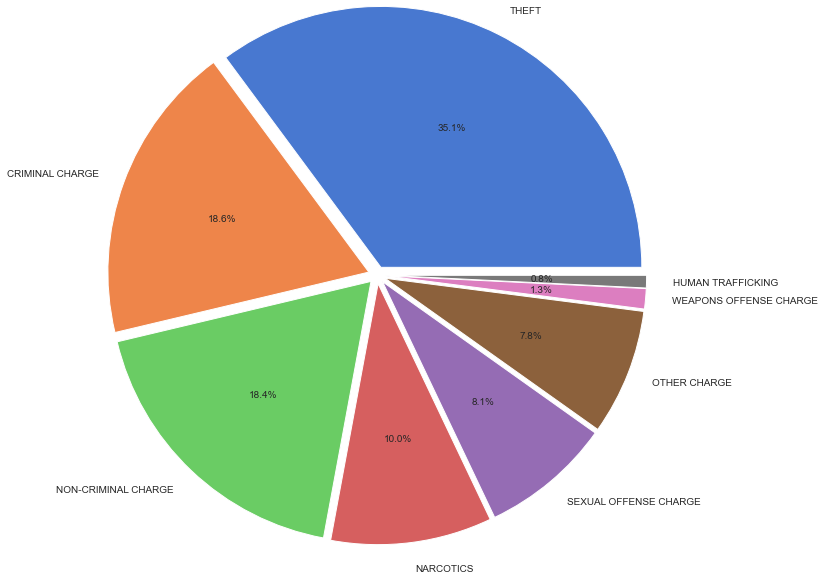

In [330]:
data=crimes_df['grouped_crime_type'].value_counts()
exp = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1)  
plt.pie(data,labels=data.index,autopct='%1.1f%%',radius=3,explode=exp)

## 2. Percentage of crime at different locations

([<matplotlib.patches.Wedge at 0x3284820d0>,
 [Text(0.7137907740418606, 3.3242296447286432, 'PUBLIC AREA'),
  Text(-2.748245688924338, -2.001785611225337, 'RESIDENTIAL AREA'),
  Text(1.5070844493896, -3.047736284918373, 'BUSINESS AREA'),
  Text(2.751827431343445, -1.9968589805255998, 'OTHER'),
  Text(3.156154426369916, -1.264392833302051, 'PUBLIC BUILDINGS'),
  Text(3.325086339522093, -0.7097892889608655, 'VEHICLE'),
  Text(3.3858088502759722, -0.3103198823680177, 'PUBLIC TRANSPORT'),
  Text(3.3995541870125376, -0.05505751143600723, 'GOVERNMENT LOCATONS')],
 [Text(0.3988830796116279, 1.857657742642477, '43.3%'),
  Text(-1.5357843555753647, -1.1186449003906291, '33.5%'),
  Text(0.8421942511294823, -1.7031467474543847, '11.1%'),
  Text(1.5377859175154545, -1.1158917832348938, '4.3%'),
  Text(1.7637333559125998, -0.7065724656687932, '3.5%'),
  Text(1.8581364838505812, -0.39664695559577773, '1.9%'),
  Text(1.892069651624808, -0.1734140519115393, '1.9%'),
  Text(1.8997508692128884, -0.03076

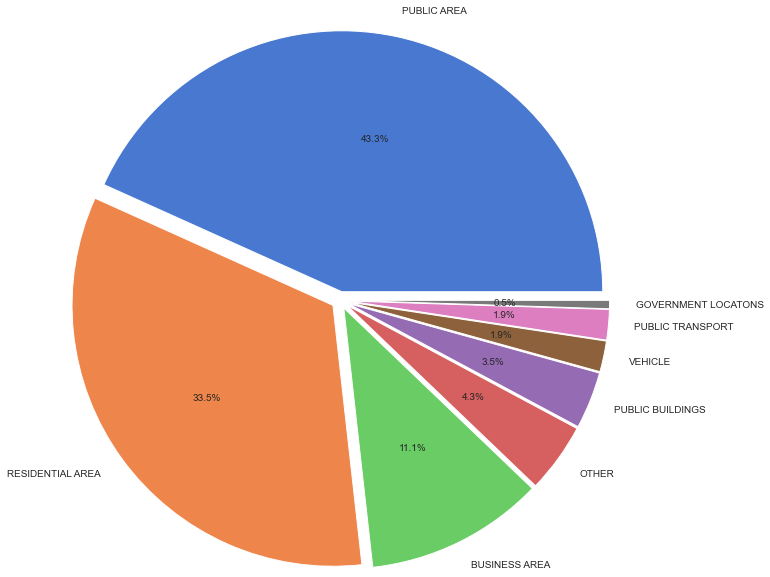

In [331]:
data=crimes_df['grouped_crime_location'].value_counts()
exp = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1)  
plt.pie(data,labels=data.index,autopct='%1.1f%%',radius=3,explode=exp)

## 3.Types of crimes occuring at different locations

[Text(0, 0, 'PUBLIC AREA'),
 Text(1, 0, 'RESIDENTIAL AREA'),
 Text(2, 0, 'BUSINESS AREA'),
 Text(3, 0, 'OTHER'),
 Text(4, 0, 'PUBLIC BUILDINGS'),
 Text(5, 0, 'VEHICLE'),
 Text(6, 0, 'PUBLIC TRANSPORT'),
 Text(7, 0, 'GOVERNMENT LOCATONS')]

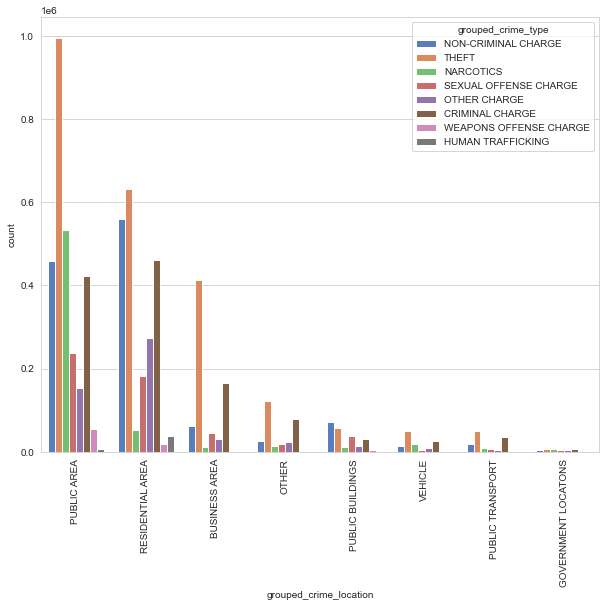

In [332]:
plt.figure(figsize = (10, 8))
count=crimes_df['grouped_crime_location'].value_counts()
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_location', data = crimes_df, order = count.iloc[:10].index,hue='grouped_crime_type')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in public area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'NARCOTICS'),
 Text(2, 0, 'NON-CRIMINAL CHARGE'),
 Text(3, 0, 'CRIMINAL CHARGE'),
 Text(4, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(5, 0, 'OTHER CHARGE'),
 Text(6, 0, 'WEAPONS OFFENSE CHARGE'),
 Text(7, 0, 'HUMAN TRAFFICKING')]

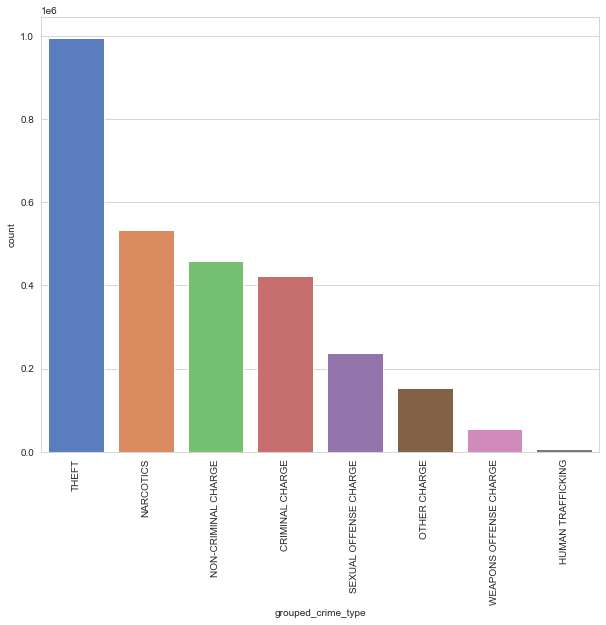

In [333]:
plt.figure(figsize = (10, 8))
publicArea_df = crimes_df[crimes_df.grouped_crime_location == 'PUBLIC AREA']
count=publicArea_df['grouped_crime_type'].value_counts()
count
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = publicArea_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in residential area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'NON-CRIMINAL CHARGE'),
 Text(2, 0, 'CRIMINAL CHARGE'),
 Text(3, 0, 'OTHER CHARGE'),
 Text(4, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'HUMAN TRAFFICKING'),
 Text(7, 0, 'WEAPONS OFFENSE CHARGE')]

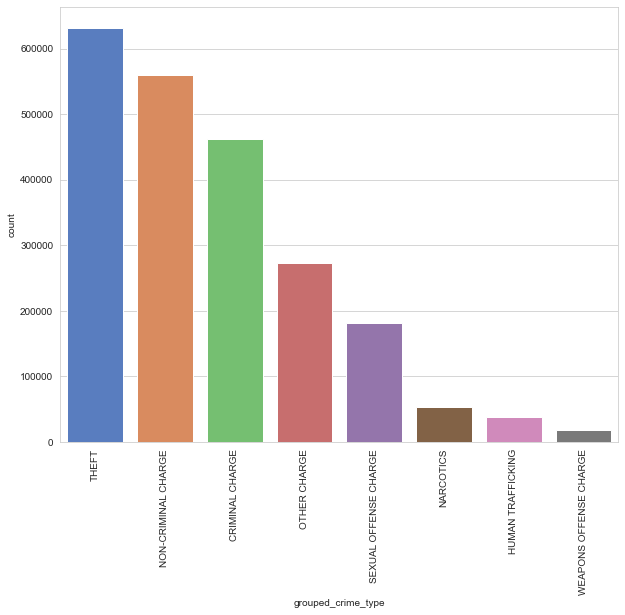

In [334]:
plt.figure(figsize = (10, 8))
residential_df = crimes_df[crimes_df.grouped_crime_location == 'RESIDENTIAL AREA']
count=residential_df['grouped_crime_type'].value_counts()
count
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = residential_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in buisness area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'CRIMINAL CHARGE'),
 Text(2, 0, 'NON-CRIMINAL CHARGE'),
 Text(3, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(4, 0, 'OTHER CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'WEAPONS OFFENSE CHARGE'),
 Text(7, 0, 'HUMAN TRAFFICKING')]

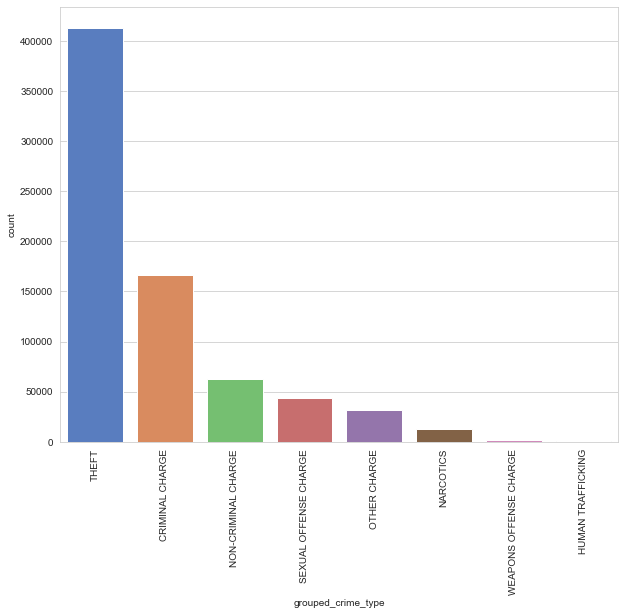

In [335]:
plt.figure(figsize = (10, 8))
bus_df = crimes_df[crimes_df.grouped_crime_location == 'BUSINESS AREA']
count=bus_df['grouped_crime_type'].value_counts()
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = bus_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

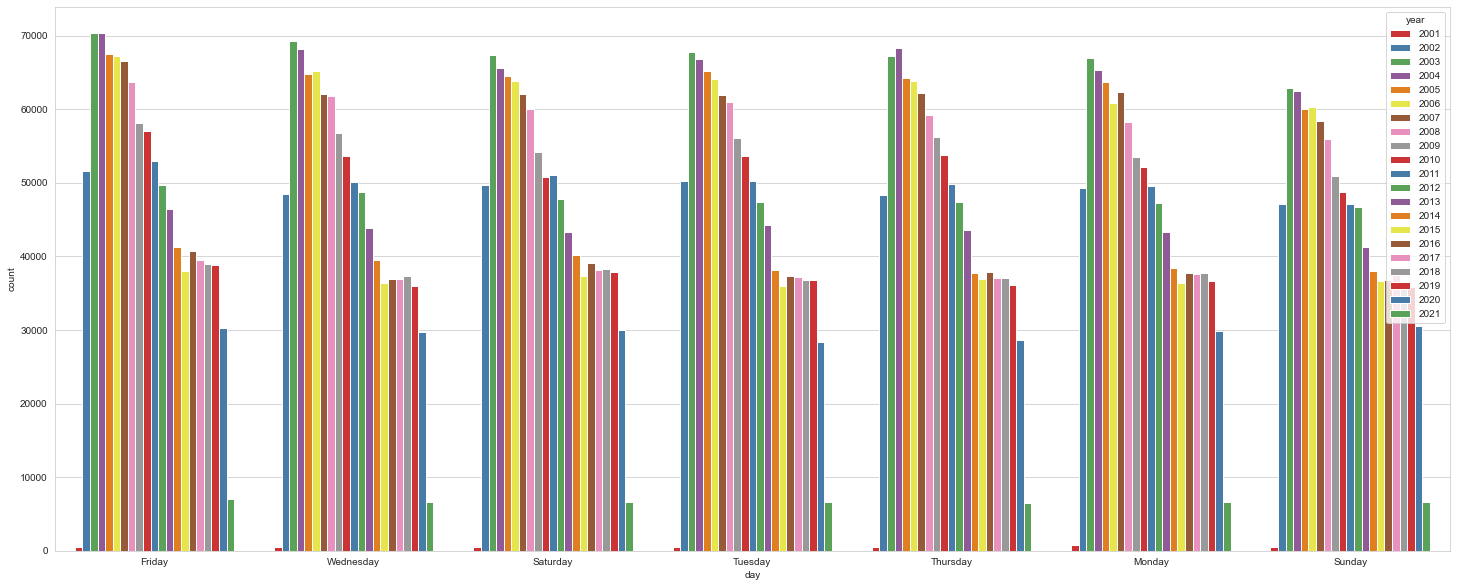

In [336]:
plt.figure(figsize=(25,10))
zone_plot = sns.countplot(data=crimes_df,x='day'
                          ,hue='year',order=crimes_df["day"].value_counts().index,palette='Set1')

## 4.Trends of Crimes in the years

In [337]:
crimes_year_df, census_year_df = read_input()

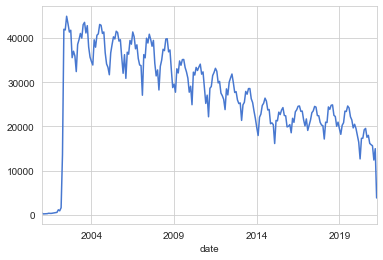

In [338]:
crimes_year_df.resample('M').size().plot()
plt.show()

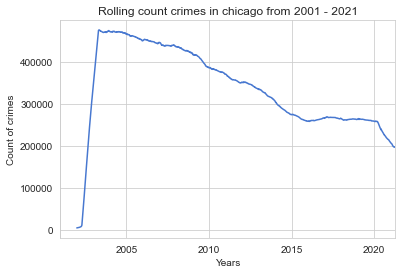

In [339]:
crimes_year_df, census_year_df = read_input()
crimes_year_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling count crimes in chicago from 2001 - 2021')
plt.ylabel('Count of crimes')
plt.xlabel('Years')
plt.show()

### Count of each crimes

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'BATTERY'),
 Text(2, 0, 'CRIMINAL DAMAGE'),
 Text(3, 0, 'NARCOTICS'),
 Text(4, 0, 'ASSAULT'),
 Text(5, 0, 'OTHER OFFENSE'),
 Text(6, 0, 'BURGLARY'),
 Text(7, 0, 'MOTOR VEHICLE THEFT'),
 Text(8, 0, 'DECEPTIVE PRACTICE'),
 Text(9, 0, 'ROBBERY')]

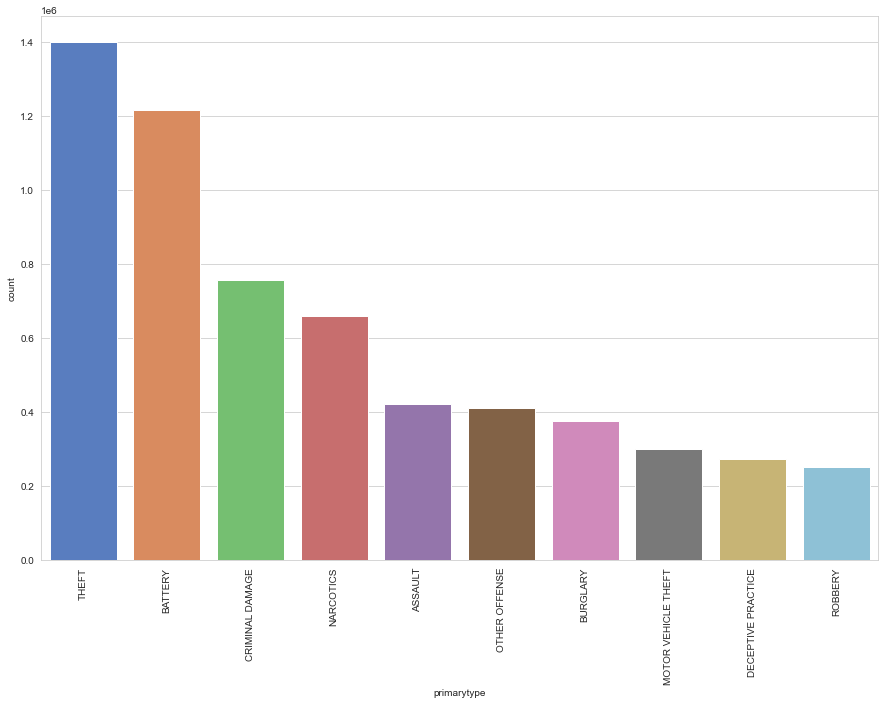

In [340]:
count = crimes_df['primarytype'].value_counts()
plt.figure(figsize = (15, 10))
sns.set_palette("muted")
plot=sns.countplot(x ='primarytype', data = crimes_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### Locations where most crimes are happening

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(0.0, 0, ''),
 Text(200000.0, 0, ''),
 Text(400000.0, 0, ''),
 Text(600000.0, 0, ''),
 Text(800000.0, 0, ''),
 Text(1000000.0, 0, ''),
 Text(1200000.0, 0, ''),
 Text(1400000.0, 0, ''),
 Text(1600000.0, 0, ''),
 Text(1800000.0, 0, '')]

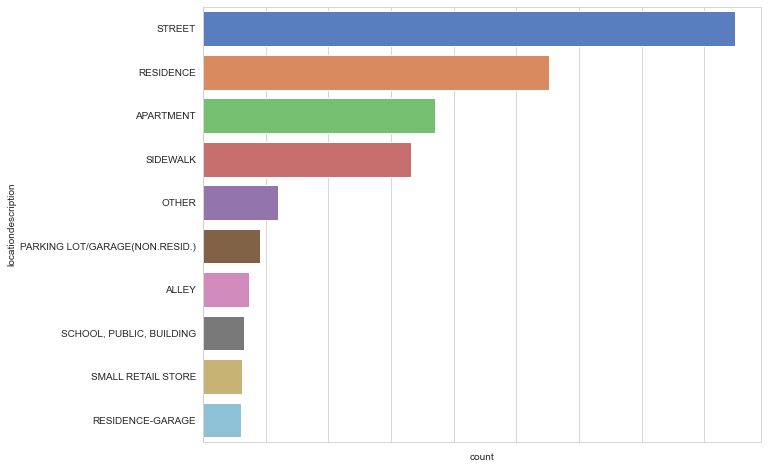

In [341]:
plt.figure(figsize = (10, 8))
sns.set_palette("muted")
count=crimes_df['locationdescription'].value_counts()
plot=sns.countplot(y ='locationdescription', data = crimes_df,order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### 4.Trends of Crimes 

### Trends of Crimes in the years

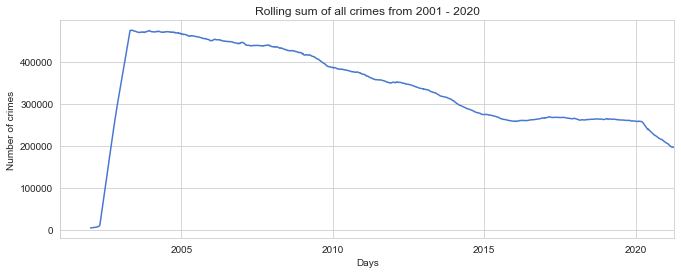

In [342]:
plt.figure(figsize=(11,4))
crimes_year_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2020')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

### Trends of Crimes monthly basis

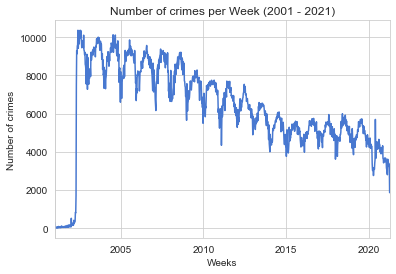

In [320]:
crimes_month_df, census_month_df=read_input()
crimes_month_df = crimes_month_df.resample('W')
crimes_month_df.size().plot(legend=False)
plt.title('Number of crimes per Week (2001 - 2021)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()

### Crimes happening monthwise

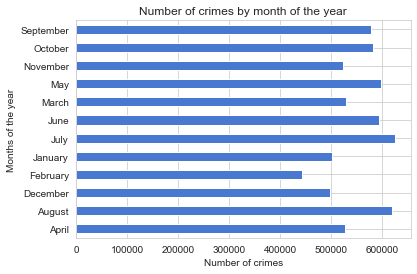

In [343]:
crimes_df.groupby([crimes_df['month']]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

### Crimes happening weekly

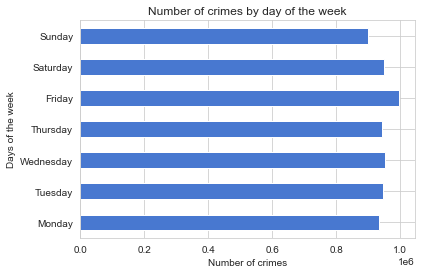

In [349]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_df.groupby([crimes_df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

### Month Wise Crimes for Crime Locations

<Figure size 792x288 with 0 Axes>

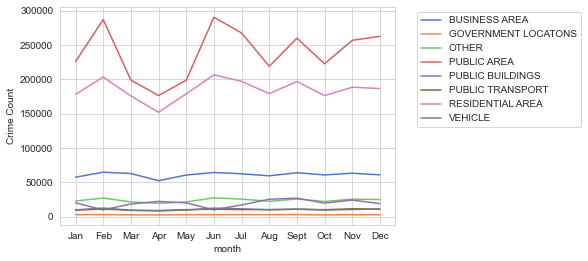

In [355]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
crime_location_month_df = crimes_df.groupby(['month', 'grouped_crime_location'])
plt.figure(figsize=(11,4))
crime_location_month_df.size().unstack().plot()
plt.ylabel('Crime Count')
plt.xticks(np.arange(12), months)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')